# Visuals of cycling routes

In [78]:
import osmnx as ox

In [79]:
G = ox.graph_from_place("Bratislava, Slovakia", network_type="drive")

# **Dunajská**

In [80]:
route_streets = ["Dunajská"]

In [81]:
# Identify edges to highlight
highlight_edges = []
for u, v, k, data in G.edges(keys=True, data=True):
    if "name" in data and data["name"] in route_streets:
        highlight_edges.append((u, v, k))

# Build edge colors and widths
edge_colors = []
edge_widths = []
for u, v, k in G.edges(keys=True):
    if (u, v, k) in highlight_edges:
        edge_colors.append('red')       # highlighted route
        edge_widths.append(4)           # thicker
    else:
        edge_colors.append('black') # other streets
        edge_widths.append(0.5)         # thinner

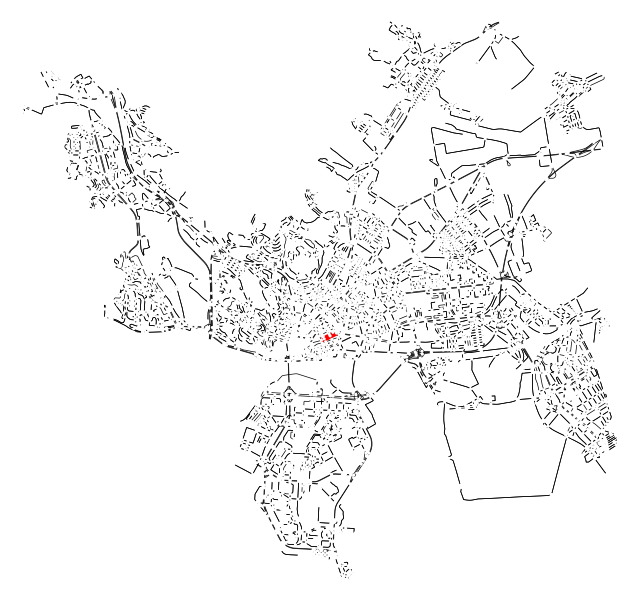

In [82]:
# Plot the graph
fig, ax = ox.plot_graph(
    G,
    node_size=5,
    edge_color=edge_colors,
    edge_linewidth=edge_widths,
    bgcolor='white'
)

# **Vajanského nábrežie**

In [98]:
route_streets = ["Vajanského nábrežie"]

In [99]:
# Identify edges to highlight
highlight_edges = []
for u, v, k, data in G.edges(keys=True, data=True):
    if "name" in data and data["name"] in route_streets:
        highlight_edges.append((u, v, k))

# Build edge colors and widths
edge_colors = []
edge_widths = []
for u, v, k in G.edges(keys=True):
    if (u, v, k) in highlight_edges:
        edge_colors.append('red')       # highlighted route
        edge_widths.append(4)           # thicker
    else:
        edge_colors.append('black') # other streets
        edge_widths.append(0.5)         # thinner

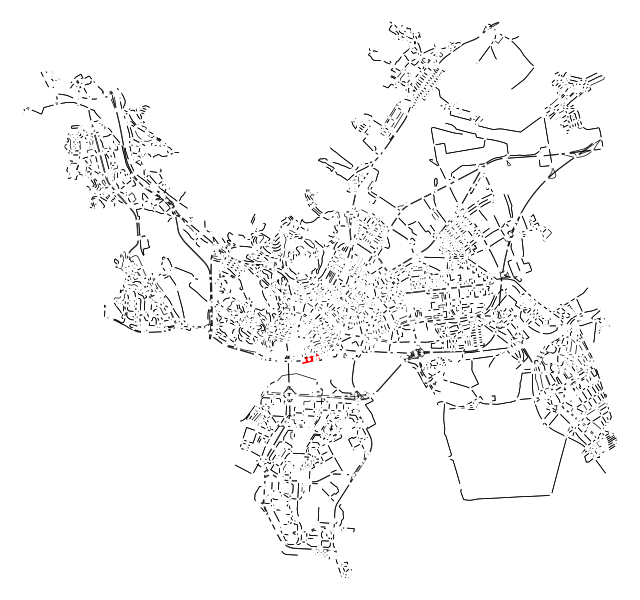

In [100]:
# Plot the graph
fig, ax = ox.plot_graph(
    G,
    node_size=5,
    edge_color=edge_colors,
    edge_linewidth=edge_widths,
    bgcolor='white'
)

# **River park**

In [101]:
route_streets = ["Žižkova"]

In [102]:
# Identify edges to highlight
highlight_edges = []
for u, v, k, data in G.edges(keys=True, data=True):
    if "name" in data and data["name"] in route_streets:
        highlight_edges.append((u, v, k))

# Build edge colors and widths
edge_colors = []
edge_widths = []
for u, v, k in G.edges(keys=True):
    if (u, v, k) in highlight_edges:
        edge_colors.append('red')       # highlighted route
        edge_widths.append(4)           # thicker
    else:
        edge_colors.append('black') # other streets
        edge_widths.append(0.5)         # thinner

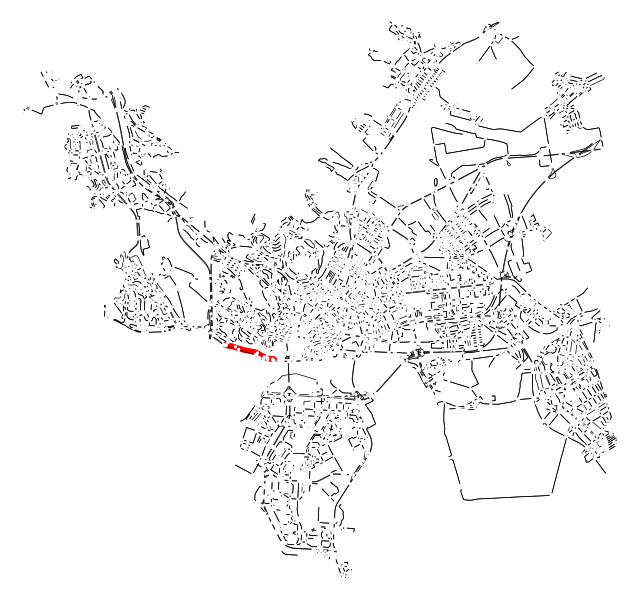

In [103]:
# Plot the graph
fig, ax = ox.plot_graph(
    G,
    node_size=5,
    edge_color=edge_colors,
    edge_linewidth=edge_widths,
    bgcolor='white'
)

# **Železná studnička**

In [104]:
route_streets = ["K Železnej studienke"]

In [105]:
# Identify edges to highlight
highlight_edges = []
for u, v, k, data in G.edges(keys=True, data=True):
    if "name" in data and data["name"] in route_streets:
        highlight_edges.append((u, v, k))

# Build edge colors and widths
edge_colors = []
edge_widths = []
for u, v, k in G.edges(keys=True):
    if (u, v, k) in highlight_edges:
        edge_colors.append('red')       # highlighted route
        edge_widths.append(4)           # thicker
    else:
        edge_colors.append('black') # other streets
        edge_widths.append(0.5)         # thinner

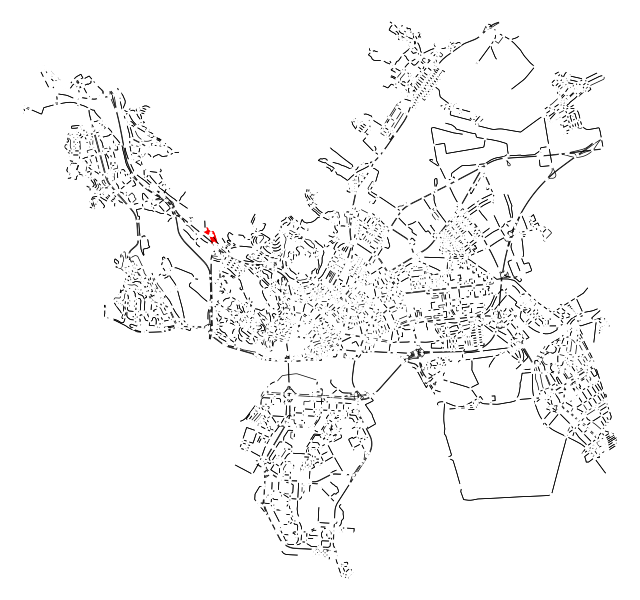

In [106]:
# Plot the graph
fig, ax = ox.plot_graph(
    G,
    node_size=5,
    edge_color=edge_colors,
    edge_linewidth=edge_widths,
    bgcolor='white'
)

# **Einsteinova**

In [107]:
route_streets = ["Einsteinova"]

In [108]:
# Identify edges to highlight
highlight_edges = []
for u, v, k, data in G.edges(keys=True, data=True):
    if "name" in data and data["name"] in route_streets:
        highlight_edges.append((u, v, k))

# Build edge colors and widths
edge_colors = []
edge_widths = []
for u, v, k in G.edges(keys=True):
    if (u, v, k) in highlight_edges:
        edge_colors.append('red')       # highlighted route
        edge_widths.append(4)           # thicker
    else:
        edge_colors.append('black') # other streets
        edge_widths.append(0.5)         # thinner

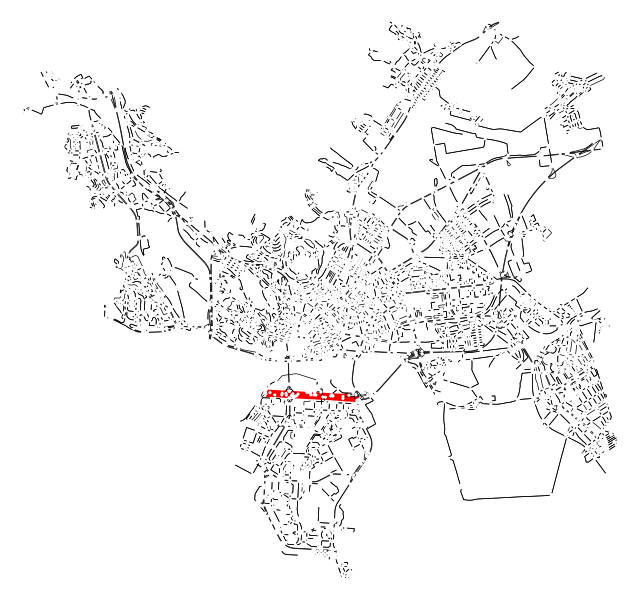

In [109]:
# Plot the graph
fig, ax = ox.plot_graph(
    G,
    node_size=5,
    edge_color=edge_colors,
    edge_linewidth=edge_widths,
    bgcolor='white'
)